# Task 2.: Eigenvalues -- Generation

## Task description

- Create a function, which calculates the eigenvalues of a random but strictly **symmetric** matrix!
- Name the function as `random_eigvals`. It should require two input parameters:
  - The first one named `dim`, which is an integer, and which equals to the size of the random matrices generated in the function.
  - The second parameter nameed as `dist`, which controls the behaviour of the number generation algorithm. If the value of `dist` is the `"normal"` string, then the random numbers in the matrix should be generated from the normal distribution using `numpy`'s [`randn`](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randn.html) function. Otherwise, random numbers are drawn from the uniform distribution in the interval [0,1] using the [`rand`](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.rand.html#numpy.random.rand) function. 
  - Make sure that in all cases the diagonal and off-diagonal elements are from the same distribution!
- The function `random_eigvals` should return with a `numpy` `array` with the eigenvalues of the random matrix inside. To calculate the eigenvalues we can use `numpy`'s [`eigvalsh`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eigvalsh.html) function.
- Using the function `random_eigvals`, calculate the eigenvalues of $50000$ matrices with normally, and $50000$ matrices with uniformly distributed elements. The matrices should be
- Ábrázoljuk a két eloszlással generált sajátértékek eloszlását (mindkét esetben tehát 50000 x 10 szám eloszlását) két hisztogramon. A hisztogram legalább 500 binből álljon! 
- A saját szavaiddal fogalmazd meg, milyen különbségeket, illetve hasonlóságokat figyelhetünk meg a két véletlen mátrix család sajátértékeire vonatkozóan a hisztogramok alapján!

## Solving the task

In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
def mat_gen(dim, dist=""):
    
    assert type(dim) == int, "The parameter `dim` should be an integer!"
    assert dim > 1, "The parameter `dim` should be greater, than 1!"
    
    # Set 
    if dist.lower() == 'normal':
        f = np.random.randn
    else:
        f = np.random.rand
    
    # Generate symmetric matrix by symmetrization
    A = f(dim, dim)
    A = (A + A.T)/2
    
    # Generate symmetric matrix by setting corresponding
    # off-diagonal elements equal to each other on both
    # sides of the diagonal
    B = np.zeros((dim, dim))
    for i in range(dim):
        for j in range(i, dim):
            num = f()            
            B[i][j] = num
            if i != j:
                B[j][i] = num
    
    return A, B

In [19]:
def random_eigvals(A):
    
    # Eigenvalues of a symmetric or Hermitian matrix
    return np.linalg.eigvalsh(A)

In [20]:
dim = 10
A, B = mat_gen(dim)

### Check symmetricity and distribution of elements of the generated matrices

#### Symmetricity

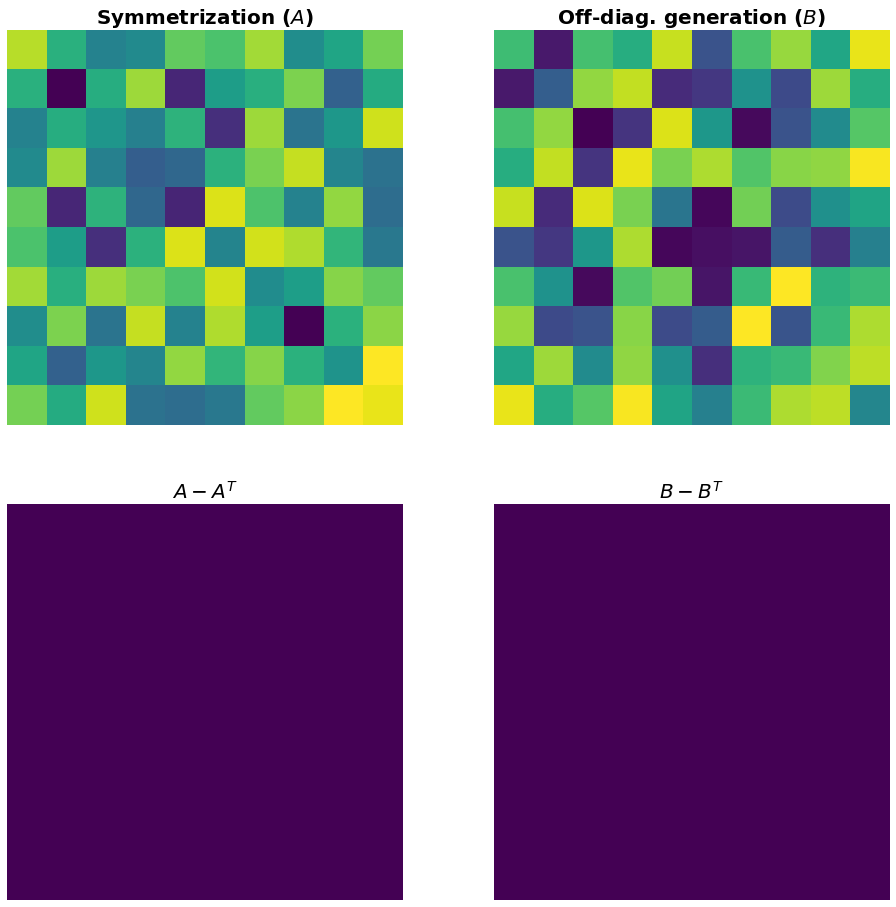

In [24]:
nrows = 2
ncols = 2
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*8, nrows*8))

axistitlesize = 20

mat = [A, B]
title_0 = [
    'Symmetrization ($A$)',
    'Off-diag. generation ($B$)'
]
title_1 = [
    '$A - A^{T}$',
    '$B - B^{T}$',
]

for i in range(ncols):
    axes[0][i].axis('off')
    
    axes[0][i].imshow(mat[i])
    
    axes[0][i].set_title(title_0[i], fontsize=axistitlesize, fontweight='bold')

for i in range(ncols):
    axes[1][i].axis('off')
    
    axes[1][i].imshow(mat[i] - mat[i].T)
    
    axes[1][i].set_title(title_1[i], fontsize=axistitlesize, fontweight='bold')

    
plt.show()

#### Distribution of elements